# Skilaverkefni 4
## 1.1 KOSNINGAURSLIT

In [37]:
from urllib.request import urlopen
f = urlopen("https://cs.hi.is/python/kosningar-2021.txt")
tafla = {}
samtals = 0
next(f)

for lína in f:
        Listi, Atkvæði, Þingsæti = lína.decode().strip().split()
        Atkvæði = int(Atkvæði)  
        Þingsæti = int(Þingsæti)  
        tafla[Listi] = (Atkvæði, Þingsæti)
        samtals += Atkvæði

print(f'{"Flokkur"} {"Atkvæði"} {"Hlutfall"} {"Þingsæti"}')
print('––––––––––––––––––––––––––––––––––––––––')

for Listi, (Atkvæði, Þingsæti) in tafla.items():
    hlutfall = (Atkvæði / samtals) * 100  
    print(f"{Listi:>4} {Atkvæði:>8} {hlutfall:>8.0f}% {Þingsæti:>5}")



Flokkur Atkvæði Hlutfall Þingsæti
––––––––––––––––––––––––––––––––––––––––
   B    34501       17%    13
   C    16628        8%     5
   D    48708       24%    16
   F    17672        9%     6
   J     8181        4%     0
   M    10879        5%     3
   O      836        0%     0
   P    17233        9%     6
   S    19825       10%     6
   V    25114       13%     8
   Y      144        0%     0


## 1.2 Aukamenn

In [38]:
from urllib.request import urlopen

f = urlopen("https://cs.hi.is/python/kosningar-2021.txt")
tafla = {}
samtals_atkvæði = 0
s = 63  
next(f)  

for lína in f:
    Listi, Atkvæði, Þingsæti = lína.decode().strip().split()
    Atkvæði = int(Atkvæði)
    Þingsæti = int(Þingsæti)
    tafla[Listi] = (Atkvæði, Þingsæti)
    samtals_atkvæði += Atkvæði

threshold = samtals_atkvæði * 0.05
qualified_flokk = {k: v for k, v in tafla.items() if v[0] >= threshold}

qualified_atkvæði = sum(v[0] for v in qualified_flokk.values())

print(f'{"Flokkur"} {"Atkvæði"} {"Hlutfall"} {"Þingsæti"} {"Sætishluti"}')
print('––––––––––––––––––––––––––––––––––––––––––––––')

for Listi, (Atkvæði, Þingsæti) in qualified_flokk.items():
    hlutfall = (Atkvæði / samtals_atkvæði) * 100
    sætishluti = (Atkvæði / qualified_atkvæði) * s
    print(f"{Listi:>4} {Atkvæði:>8} {hlutfall:>8.0f}% {Þingsæti:>5} {sætishluti:>10.02f}")



Flokkur Atkvæði Hlutfall Þingsæti Sætishluti
––––––––––––––––––––––––––––––––––––––––––––––
   B    34501       17%    13      11.41
   C    16628        8%     5       5.50
   D    48708       24%    16      16.10
   F    17672        9%     6       5.84
   M    10879        5%     3       3.60
   P    17233        9%     6       5.70
   S    19825       10%     6       6.55
   V    25114       13%     8       8.30


## 2.1
### Vedurskra lesinn

In [39]:
from urllib.request import urlopen

f = urlopen("https://cs.hi.is/python/hiti-urkoma.txt")
list1, list2, list3 = [], [], []

for line in f:
    values = line.decode('utf-8').strip().split() 
    if len(values) >= 3: 
        list1.append(values[0])
        list2.append(values[1])
        list3.append(values[2])

def print_table(header, rows):
    print(f"{header[0]:<15}{header[1]:<15}{header[2]:<15}")
    print("-"*45)
    for row in rows:
        print(f"{row[0]:<15}{row[1]:<15}{row[2]:<15}")

headers = ["Dagsetning", "Hitastig", "Urkoma"]
rows_first_5 = list(zip(list1[:5], list2[:5], list3[:5]))
rows_last_5 = list(zip(list1[-5:], list2[-5:], list3[-5:]))

print("Fyrstu 5 gildin:")
print_table(headers, rows_first_5)
print
print("Síðustu 5 gildin:")
print_table(headers, rows_last_5)



Fyrstu 5 gildin:
Dagsetning     Hitastig       Urkoma         
---------------------------------------------
1949           3.2            565.5          
1950           4.0            535.5          
1951           3.4            460.6          
1952           3.6            495.7          
1953           4.4            979.0          
Síðustu 5 gildin:
Dagsetning     Hitastig       Urkoma         
---------------------------------------------
2014           5.3            678.8          
2015           4.1            804.4          
2016           5.5            806.2          
2017           4.9            678.6          
2018           4.5            875.3          


##  2.2 Meðalhiti og köld ar

In [40]:
hitastig = [float(h) for h in list2]
medalhiti = sum(hitastig) / len(hitastig)
minnsta_hitastig = min(hitastig)
index_kaldasta = hitastig.index(minnsta_hitastig)
kaldasta_ar = list1[index_kaldasta]
ar_undir3 = sum(h < 3 for h in hitastig)

print(f"Meðalhiti allra áranna: {medalhiti:.2f}°C")
print(f"Kaldasta árið var {kaldasta_ar} með meðalhita {minnsta_hitastig}°C")
print(f"Fjöldi ára með meðalhita undir 3°C: {ar_undir3}")


Meðalhiti allra áranna: 3.96°C
Kaldasta árið var 1979 með meðalhita 2.3°C
Fjöldi ára með meðalhita undir 3°C: 4


##  2.3

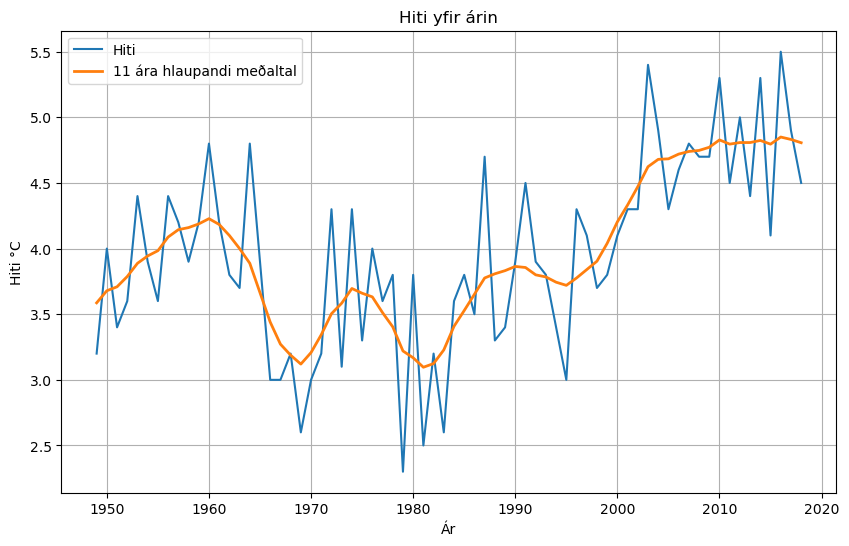

In [41]:
import matplotlib.pyplot as plt

def hlaupmedal(x, d=5):
    """skilar lista með hlaupandi (2d+1)-sæta þríhyrningsmeðaltali"""
    n = len(x)
    hm = [0]*n
    for i in range(n):
        m = max(0, i-d)
        M = min(n, i+d+1)
        w = [d-abs(k-i) for k in range(m,M)]
        hm[i] = sum([x[m+j]*w[j] for j in range(M-m)]) / sum(w)
    return hm

hitastig = [float(h) for h in list2]
hlaupandi_medaltal = hlaupmedal(hitastig)
ar = [int(ar) for ar in list1]
plt.figure(figsize=(10, 6)) 
plt.plot(ar, hitastig, label='Hiti')
plt.plot(ar, hlaupandi_medaltal, label='11 ára hlaupandi meðaltal', linewidth=2)  
plt.title('Hiti yfir árin')
plt.xlabel('Ár')
plt.ylabel('Hiti °C')
plt.legend()  
plt.grid(True)  

plt.show()


## 2.5 + 2.6 Urkoma Túlkun á niðurstöðum

Punktaritið sýnir samband úrkomu (mm) og hitastigs (°C) yfir árin 1949 til 2018. 

### Upplýsingar
- **Breytingar yfir árin:** Ef litir breytast á myndinni í átt að ákveðnum stefnum getur það bent til breytinga í hitastigi eða úrkomu yfir tímabilið.
- **Samband úrkomu og hitastigs:** Mynstur sem sýnir samband á milli hærri hitastigs og minni úrkomu gæti gefið til kynna veðurfarslegt samband.

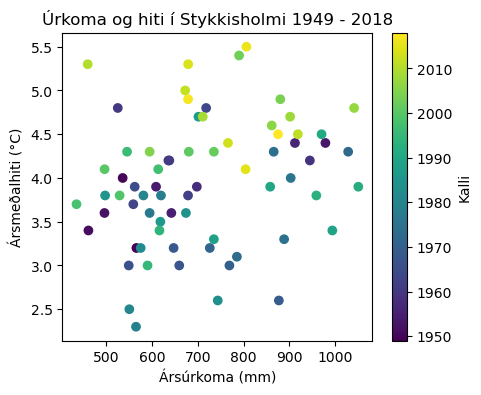

In [42]:
from urllib.request import urlopen

f = urlopen("https://cs.hi.is/python/hiti-urkoma.txt")
list1, list2, list3 = [], [], []
list1, list2, list3 = [], [], []  

for line in f:
    values = line.decode('utf-8').strip().split()

    if len(values) >= 3:
        list1.append(int(values[0]))  
        list2.append(float(values[1])) 
        list3.append(float(values[2])) 


plt.figure(figsize=(5, 4))
scatter = plt.scatter(list3, list2, c=list1, cmap='viridis')
plt.colorbar(scatter, label="Kalli")
plt.xlabel('Ársúrkoma (mm)')
plt.ylabel('Ársmeðalhiti (°C)')
plt.title('Úrkoma og hiti í Stykkisholmi 1949 - 2018')
plt.show()